# Intro:

Welcome to an outline of some preliminary EDA I did for my thesis. My thesis focused on answering the question, are data privacy protection laws sufficient incentives for companies to prevent data breaches? The following exercise, while certainly not rigorous by any standard, has some worrying implications that the GDPR & CCPA are not addressing the root cause of the problem.

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
sns.set(style='whitegrid')
sns.despine()

<Figure size 432x288 with 0 Axes>

In [16]:
# Data scraped from a Wikipedia report (https://en.wikipedia.org/wiki/List_of_data_breaches)

df = pd.read_excel(r"C:\Users\Chris\Desktop\projects\thesis\bin\data_breaches.xlsx")
groups = df['industry']
## Getting industry sums to see worst offenders
industries = df.groupby('industry').records.sum()
industries = pd.DataFrame(industries)
industries = industries.reset_index()
industries

,industry,records
0,Clinical Laboratory,11900000
1,Consumer Goods,150000000
2,Question & Answer,100000000
3,Telephone directory,299055000
4,academic,7140540
5,advertising,75000
6,background check,56000000
7,banking,90000
8,"consulting, accounting",350
9,data broker,340000000


In [17]:
#Some summary statistics
df.describe()

,year,records
count,278.000000,2.780000e+02
mean,2013.046763,5.429393e+07
std,4.024470,2.674723e+08
min,2004.000000,3.500000e+02
25%,2010.000000,2.637500e+05
50%,2013.000000,1.950000e+06
75%,2016.000000,1.500000e+07
max,2020.000000,3.000000e+09


Text(0, 0.5, 'Frequency')

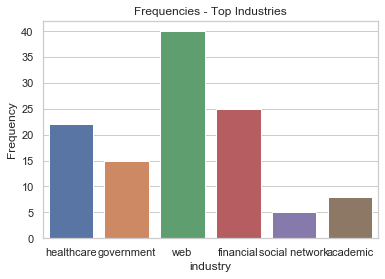

In [18]:
#removing outliers
import scipy.stats as stats
zscores = stats.zscore(df['records'])
abs_zscores = np.abs(zscores)
filtered =abs_zscores < 3
new_df=df[filtered]

#Filtering out some of the noise so we can look at more typical industries.
filters = ['healthcare','web','government','financial','academic','social network']
new_df2 = new_df[new_df.industry.isin(filters)]
reason_filters = ['hacked','poor security','inside job', 'social engineering']
new_df2 = new_df2[new_df2.reason.isin(reason_filters)]
new_df2

#Plotting frequencies
sns.countplot( x="industry", data=new_df2)
plt.title('Frequencies - Top Industries')
plt.ylabel('Frequency')

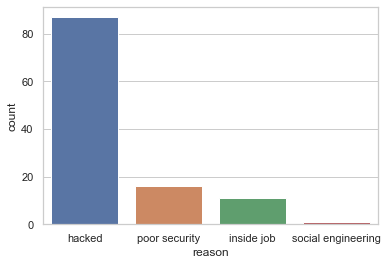

In [19]:
#What's the frequency of each reason why records were lost?
sns.countplot(x='reason',data=new_df2)

# Interpretation
So, we see that the web and finance industries have the most occurrences, with healthcare a close third. Interestingly, we see that hacking is the most commonly reported reason for data breaches. However, is hacking responsible for the most amount of records lost?

Text(0.5, 1, 'Records Lost by Reason')

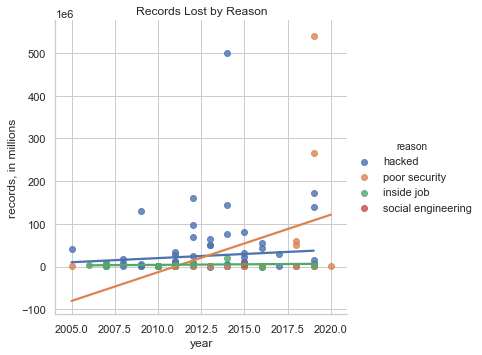

In [12]:
## GLM of reasons over time
sns.lmplot(x='year',y='records',fit_reg =True, data=new_df2,hue='reason',ci=None,truncate=True)
plt.ticklabel_format(axis='y',style='sci', scilimits=(6,6))
plt.ylabel('records, in millions')
plt.xlabel('year')
plt.title('Records Lost by Reason')

# Interpretation
Notice the upward trend for poor security. While data are scarce for the particular subject, the directional implications are worrying. It appears that lack of security is positively correlated with the total amount of records lost. Simply put, it looks like it's not skilled hackers who steal the most information, it's inattentive companies who end up losing it inadvertenly. 

# Next Steps
The GDPR and similar legislation, ideally, should be reducing the overall amount of information lost, as that's the law's primary purpose (data integrity, protection, and privacy). Let's look at the trend over time:

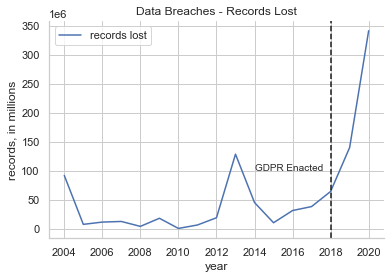

In [13]:
sns.lineplot(df['year'],df['records'], label='records lost', ci=None)
plt.ticklabel_format(axis='y',style='sci', scilimits=(6,6))
plt.axvline(x=2018,color='k',linestyle='--')
plt.text(2014,99999990,'GDPR Enacted',rotation=0)
plt.ylabel('records, in millions')
plt.title('Data Breaches - Records Lost')
sns.despine()

If anything, the trend is showing the opposite, with a practically exponential amount of growth in total records lost over time. Granted, this could be because companies are now reporting a lot more than they used to, which would indicate the GDPR's effectiveness in promoting accountability. Nevertheless, the fundamental problem appears to be worse than previously thought. 

# Conclusion

Legislation should be enacted to provide stiffer incentives for proper security measures to be implemented (i.e. fines for lack of compliance), and a set of standardized best practices should be adopted across industries to prevent data breaches from occurring before they have to get reported.